In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import molplotly

import helper_funcs as my_funcs
import math
import plotly.express as px
import molplotly

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import susi
from susi.SOMPlots import plot_nbh_dist_weight_matrix, plot_umatrix, plot_estimation_map, plot_som_histogram

%matplotlib inline

In [7]:
rdkit_fp = pd.read_csv("DBVersions/rdkit_fp_de_salted.csv", index_col=0)
device_fp = pd.read_csv("DBVersions/device_fp_plus_cosensclust.csv", index_col=0)
descriptors = pd.concat([rdkit_fp, device_fp], axis=1)
smiles = pd.read_csv("DBVersions/cleaned_SMILES.csv", index_col=0)["SMILES"]
pce = pd.read_csv("DBVersions/clarke_DSSCDB.csv")["PCE"]

In [14]:
descriptors.head()

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,"Co-adsorbent Conc. (mM)_(1476.0, 1967.667]","Co-adsorbent Conc. (mM)_(1967.667, 2459.333]","Co-adsorbent Conc. (mM)_(2459.333, 2951.0]","Co-adsorbent Conc. (mM)_(2951.0, 3442.667]","Co-adsorbent Conc. (mM)_(3442.667, 3934.333]","Co-adsorbent Conc. (mM)_(3934.333, 4426.0]",CoSensCluster_0,CoSensCluster_1,CoSensCluster_2,CoSensCluster_None
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(device_fp, pce, test_size=0.2)

### Unsupervised Learning

In [57]:
som = susi.SOMClustering(n_rows=20, n_columns=20, n_iter_unsupervised=10000, n_jobs=10)
som.fit(descriptors)

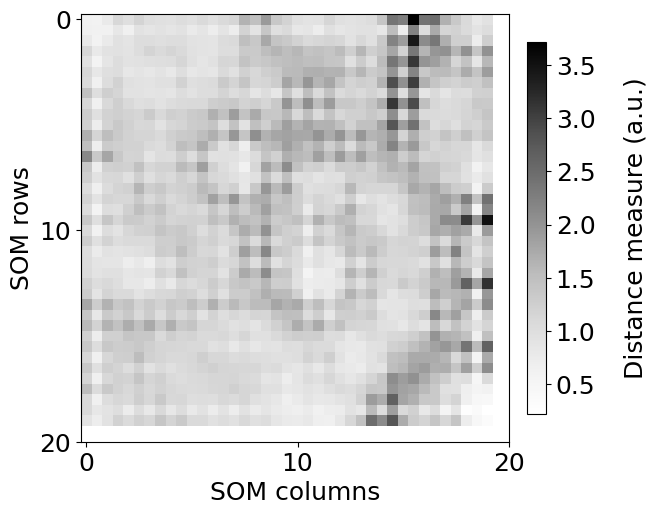

In [58]:
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 20, 20)
plt.show()

In [19]:
descriptors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4426 entries, 0 to 4425
Columns: 1144 entries, Bit_0 to CoSensCluster_None
dtypes: int64(1144)
memory usage: 38.7 MB


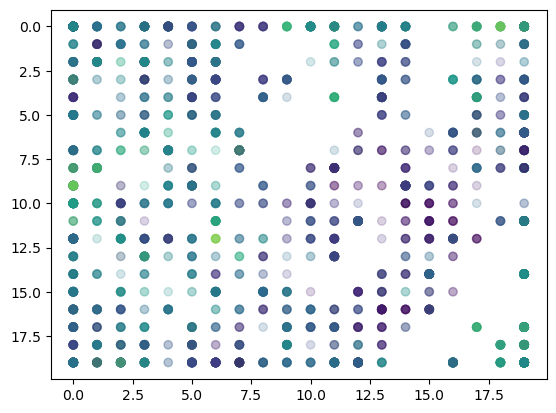

In [59]:
clusters = som.get_clusters(descriptors.values)
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=pce, alpha=0.2)
plt.gca().invert_yaxis()
plt.show()

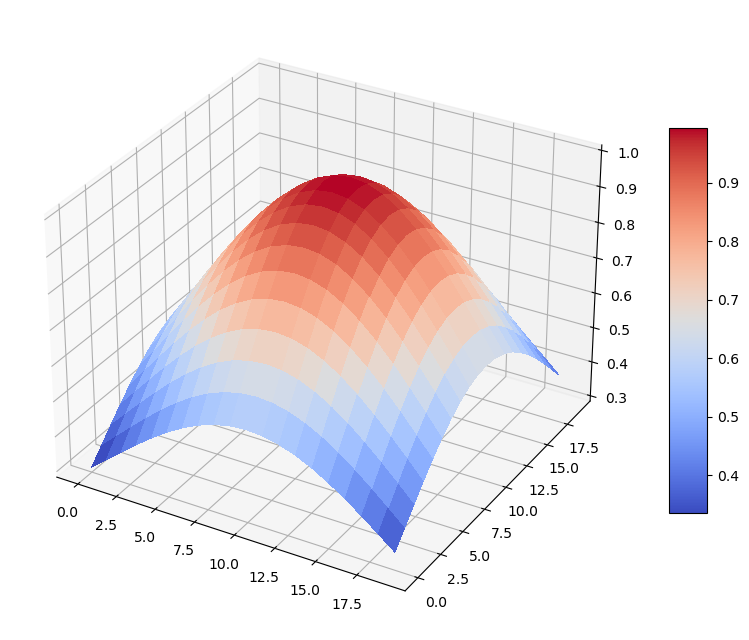

In [60]:
plot_nbh_dist_weight_matrix(som)
plt.show()

### SOM Regressor

In [61]:
som_reg = susi.SOMRegressor(
    n_rows=50,
    n_columns=50,
    n_iter_unsupervised=5000,
    n_iter_supervised=5000,
    neighborhood_mode_unsupervised="linear",
    neighborhood_mode_supervised="linear",
    learn_mode_unsupervised="min",
    learn_mode_supervised="min",
    learning_rate_start=0.9,
    learning_rate_end=0.05,
    # do_class_weighting=True,
    # distance_metric = "spectralangle",
    random_state=None,
    n_jobs=20)


scaler = StandardScaler()
scaler.fit(Y_train.values.reshape(-1,1))
scaled_Y_train = scaler.transform(Y_train.values.reshape(-1,1))

scaled_Y_test = scaler.transform(Y_test.values.reshape(-1,1))

som_reg.fit(X_train, scaled_Y_train)

c:\Users\clarkep\AppData\Local\anaconda3\envs\my-rdkit-env\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SOMRegressor(learning_rate_start=0.9, n_columns=50, n_iter_supervised=5000,
             n_iter_unsupervised=5000, n_jobs=20, n_rows=50)

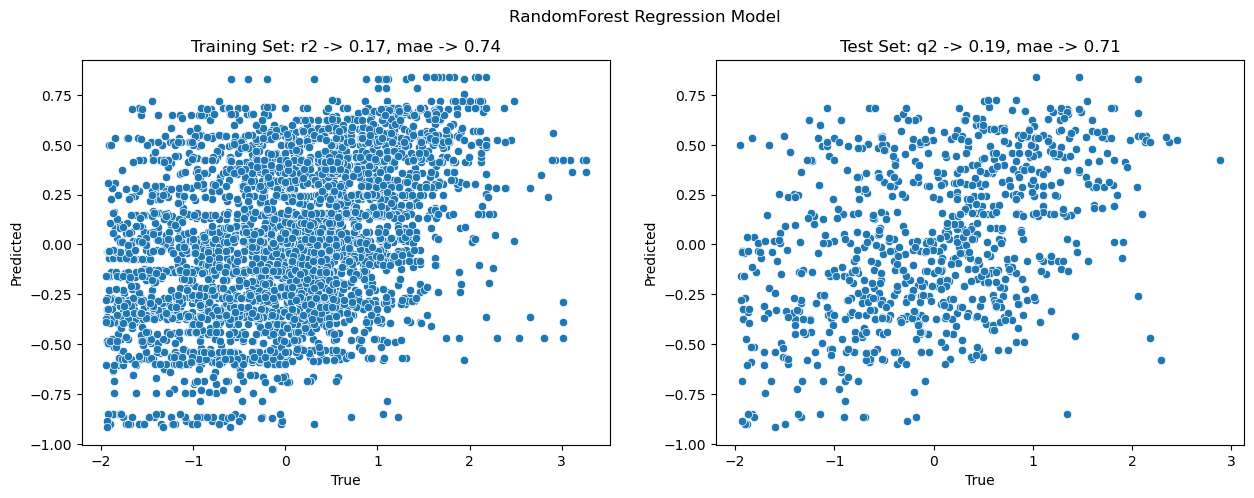

In [62]:
my_funcs.regression_results(som_reg, X_train, X_test, scaled_Y_train.flatten(), scaled_Y_test.flatten())

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

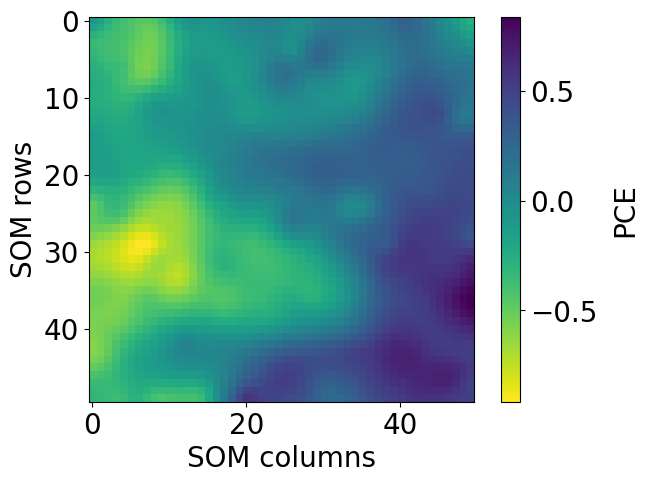

In [63]:
estimation_map = np.squeeze(som_reg.get_estimation_map())
plot_estimation_map(
    estimation_map, cbar_label="PCE", cmap="viridis_r")
plt.show()

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

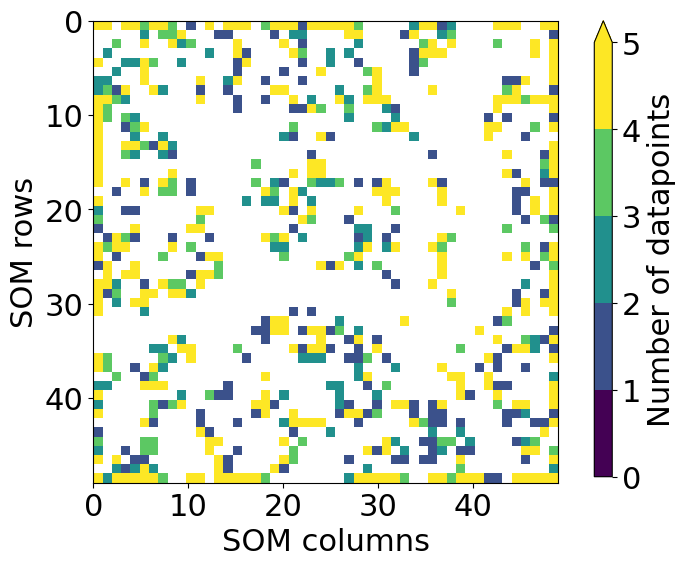

In [64]:
bmu_list = som_reg.get_bmus(X_train.values, som_reg.unsuper_som_)
plot_som_histogram(bmu_list, 50, 50)
plt.show()

In [ ]:
u_matrix = som_reg.get_u_matrix(mode="mean")
plot_umatrix(u_matrix, som_reg.n_rows, som_reg.n_columns)
plt.show()